<a href="https://colab.research.google.com/github/OlgaManakova2021/VS_to_GitHub/blob/master/Colab%26GitHub/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Pipeline подготовки данных и препроцессинг <br> 1. Загружаем данные <br>1.1. Визуализация данных <br>2. Смотрим пропуски и проверяем типы данных <br>3. Смотрим описательную статистику <br>4. Кодируем категориальные признаки <br>5. Смотрим корреляцию <br>6. Масштабирование (нормализация) <br>7. Разделение на тестовую и обучающую выборки <br>8. Обучение модели линейной регрессии

##1. Загружаем данные

In [ ]:
!git clone https://github.com/OlgaManakova2021/Data.git

fatal: destination path 'Data' already exists and is not an empty directory.


In [ ]:
data = pd.read_csv('/content/Data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5, 1.0, 'Соответствие медицинского счета возрасту')

<Figure size 600x600 with 0 Axes>

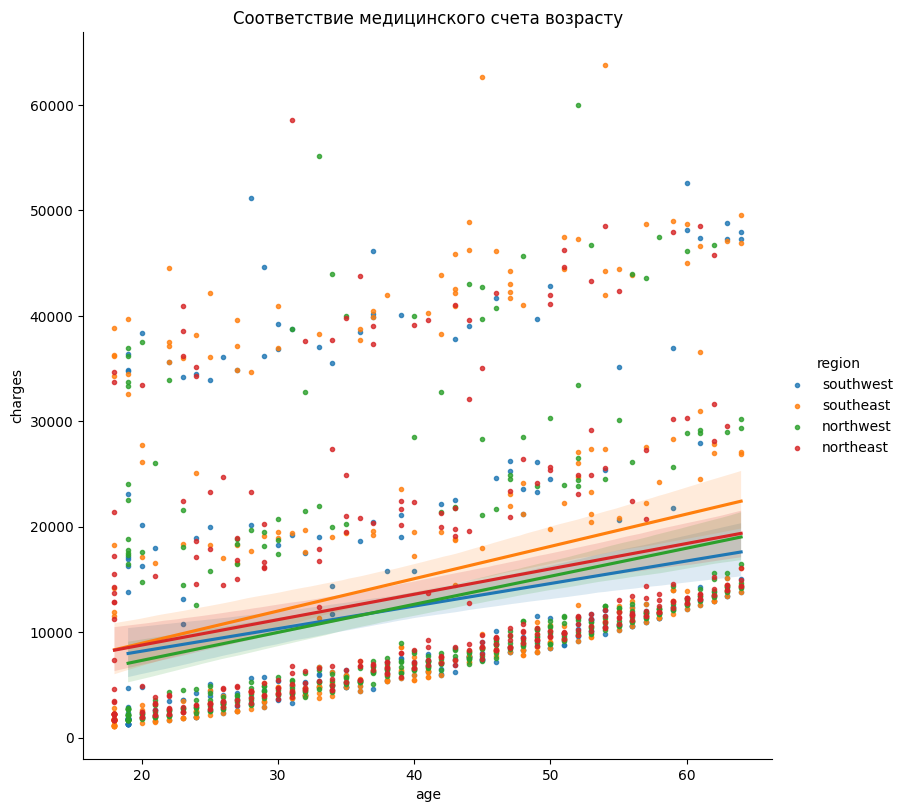

In [ ]:
plt.figure(figsize=(6,6))
sns.lmplot(x='age', y='charges', data=data, markers='.', hue ='region', height=8, aspect=1)
plt.title('Соответствие медицинского счета возрасту')

Text(0.5, 0, 'Возраст')

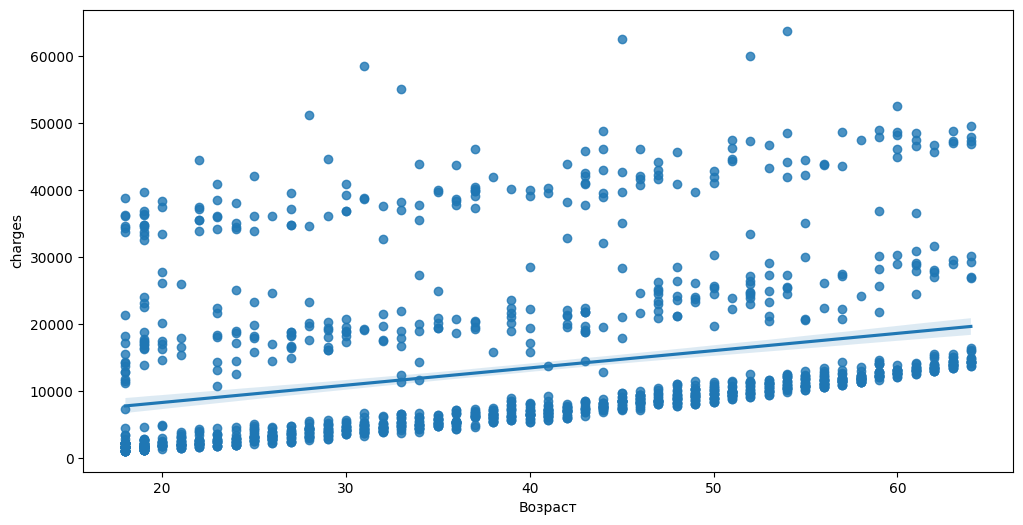

In [ ]:
plt.figure(figsize=(12,6))
sns.regplot(x='age', y='charges', data=data)
plt.xlabel('Возраст')

##2. Смотрим пропуски

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##3. Смотрим описательную статистику

In [ ]:
data.describe() #для числовых признаков

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# для категориальных признаков
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


##4. Кодируем категориальные признаки

In [ ]:
cat_data = data[data.describe(include='object').columns.to_list()]
cat_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [ ]:
cat_data['sex_le'] = cat_data['sex'].map({'male': 0,
                                          'female': 1})
cat_data.head()

,sex,smoker,region,sex_le
0,female,yes,southwest,1
1,male,no,southeast,0
2,male,no,southeast,0
3,male,no,northwest,0
4,male,no,northwest,0


In [ ]:
cat_data['smoker_le'] = cat_data['smoker'].map({'no': 0,
                                          'yes': 1})
cat_data.head()

,sex,smoker,region,sex_le,smoker_le
0,female,yes,southwest,1,1
1,male,no,southeast,0,0
2,male,no,southeast,0,0
3,male,no,northwest,0,0
4,male,no,northwest,0,0


In [ ]:
from sklearn.preprocessing import (LabelEncoder,
                                   OneHotEncoder) # кодирование категориальных признаков

In [ ]:
le = LabelEncoder()

cat_data['region_le'] = le.fit_transform(cat_data['region'])
cat_data

,sex,smoker,region,sex_le,smoker_le,region_le
0,female,yes,southwest,1,1,3
1,male,no,southeast,0,0,2
2,male,no,southeast,0,0,2
3,male,no,northwest,0,0,1
4,male,no,northwest,0,0,1
...,...,...,...,...,...,...
1333,male,no,northwest,0,0,1
1334,female,no,northeast,1,0,0
1335,female,no,southeast,1,0,2
1336,female,no,southwest,1,0,3


In [ ]:
cols_to_drop = data[data.describe(include='object').columns.to_list()]
cols_to_drop

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [ ]:
cat_data = cat_data.drop(cols_to_drop, axis=1)
cat_data.head()

,sex_le,smoker_le,region_le
0,1,1,3
1,0,0,2
2,0,0,2
3,0,0,1
4,0,0,1


In [ ]:
num_data = data[data.describe().columns.to_list()]
num_data.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [ ]:
dataset = pd.concat([num_data, cat_data], axis=1)
dataset.head()

,age,bmi,children,charges,sex_le,smoker_le,region_le
0,19,27.900,0,16884.92400,1,1,3
1,18,33.770,1,1725.55230,0,0,2
2,28,33.000,3,4449.46200,0,0,2
3,33,22.705,0,21984.47061,0,0,1
4,32,28.880,0,3866.85520,0,0,1


##5. Смотрим корреляцию

In [ ]:
dataset.corr()

,age,bmi,children,charges,sex_le,smoker_le,region_le
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.025019,0.002127
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.003750,0.157566
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.007673,0.016569
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.787251,-0.006208
sex_le,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-0.076185,-0.004588
smoker_le,-0.025019,0.003750,0.007673,0.787251,-0.076185,1.000000,-0.002181
region_le,0.002127,0.157566,0.016569,-0.006208,-0.004588,-0.002181,1.000000


<Axes: >

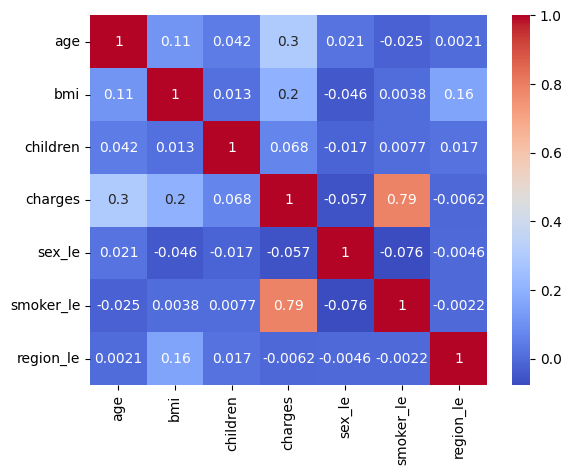

In [ ]:
sns.heatmap(dataset.corr(), cmap='coolwarm', annot = True)

In [ ]:
## отберем топ К коррелируемых признаков
k = 4
corrmat = dataset.corr()
cols = corrmat.nlargest(k, 'charges')['charges']
cols

,charges
charges,1.000000
smoker_le,0.787251
age,0.299008
bmi,0.198341


###для топ признаков построим матрицу корреляции

<Axes: >

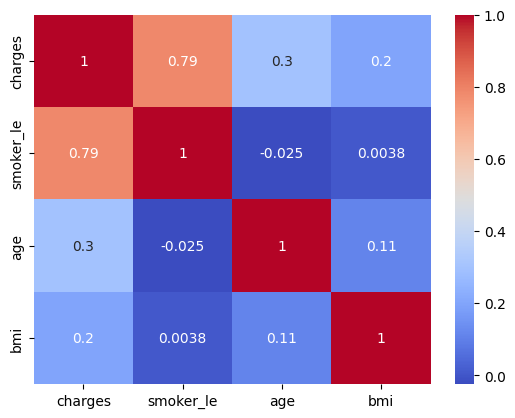

In [ ]:
sns.heatmap(dataset[cols.index.to_list()].corr(), cmap='coolwarm', annot = True)

##6. Масштабирование (нормализация)

In [ ]:
from sklearn.preprocessing import MinMaxScaler # масштабирование

In [ ]:
y = np.array(dataset['charges'])
X = np.array(dataset.drop('charges', axis=1))

In [ ]:
X[:3]

array([[19.  , 27.9 ,  0.  ,  1.  ,  1.  ,  3.  ],
       [18.  , 33.77,  1.  ,  0.  ,  0.  ,  2.  ],
       [28.  , 33.  ,  3.  ,  0.  ,  0.  ,  2.  ]])

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled[:3]

array([[0.02173913, 0.3212268 , 0.        , 1.        , 1.        ,
        1.        ],
       [0.        , 0.47914985, 0.2       , 0.        , 0.        ,
        0.66666667],
       [0.2173913 , 0.45843422, 0.6       , 0.        , 0.        ,
        0.66666667]])

##7. Разделение на тестовую и обучающую выборки

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 6)
(402, 6)
(936,)
(402,)


##8. Обучение модели линейной регрессии

In [ ]:
from sklearn.linear_model import LinearRegression #линейная регрессия

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.predict(X_test[:2])

array([8931.42116433, 7070.90670308])

In [ ]:
y_test[:2]

array([9095.06825, 5272.1758 ])

###Для оценки качества будем использовать коэффициент детерминации

In [ ]:
r_sq = lr.score(X_train, y_train)
r_sq

0.74225713201721

fghjkl;